A bar chart (aka bar graph, column chart) plots numeric values for levels of a categorical feature as bars. Levels are plotted on one chart axis, and values are plotted on the other axis. Each categorical value claims one bar, and the length of each bar corresponds to the bar’s value. Bars are plotted on a common baseline to allow for easy comparison of values.

When you should use a bar chart
A bar chart is used when you want to show a distribution of data points or perform a comparison of metric values across different subgroups of your data. From a bar chart, we can see which groups are highest or most common, and how other groups compare against the others. Since this is a fairly common task, bar charts are a fairly ubiquitous chart type.

One of the variable is a categorical variable and the other one is a numerical variable

## Material on how to choose the right data visualization

https://cdn2.hubspot.net/hubfs/392937/How-To-Choose-The-Right-Data-Visualization.pdf

### Here we are using used cars dataset

In [37]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("D:\cn c++\CAR DETAILS FROM CAR DEKHO.csv")

In [106]:
df.head()
df.shape

(4340, 8)

### Finding unique values in each column

In [16]:
for ele in df.columns:
    print(df[ele].value_counts())
    print()
    print("No of unique elements present in this column", df[ele].nunique())
    print()
    print("No of null elements present in the column", df[ele].isnull().sum())
    print()

Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: name, Length: 1491, dtype: int64

No of unique elements present in this column 1491

No of null elements present in the column 0

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

No of un

As we can see that there are no null values present in the column

In [85]:
car_models = pd.DataFrame(df["name"].value_counts() )
car_models

,name
Maruti Swift Dzire VDI,69
Maruti Alto 800 LXI,59
Maruti Alto LXi,47
Maruti Alto LX,35
Hyundai EON Era Plus,35
...,...
Hyundai Verna Transform CRDi VGT SX ABS,1
Maruti S-Presso VXI Plus,1
Toyota Etios Liva 1.2 VX,1
Toyota Yaris G,1


In [169]:
car_models["car_name"] = car_models.index
car_models.set_index(np.arange(1491), inplace = True)
car_models.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490],
           dtype='int64', length=1491)

In [88]:
# Renaming a column
car_models.rename(columns = {'name':'total_count'}, inplace = True)
car_models.head()

,total_count,car_name
0,69,Maruti Swift Dzire VDI
1,59,Maruti Alto 800 LXI
2,47,Maruti Alto LXi
3,35,Maruti Alto LX
4,35,Hyundai EON Era Plus


### Conclusion

As we can see that there are 695 models which have only 1 car listed and 319 models which have only 2 car listed so we want to group them in to a single category called exotic

In [100]:
li = car_models.car_name[(car_models.total_count <= 2)].values

In [101]:
li

array(['Ford Fiesta 1.6 ZXi Leather', 'Honda Amaze E i-VTEC',
       'Ford Figo Trend', ..., 'Toyota Etios Liva 1.2 VX',
       'Toyota Yaris G', 'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [107]:
df.name = [df.name[i] == 'exotic' if df.name[i] in li for i in range(4340)]

SyntaxError: invalid syntax (Temp/ipykernel_7208/348077226.py, line 1)

In [132]:
df.name = df['name'].replace('others','exotic')
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,exotic,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [114]:
from matplotlib import pyplot as plt
import seaborn as sns

In [138]:
df.name[df.name == 'exotic'].count()

1333

In [139]:
df.shape

(4340, 8)

In [201]:
new_df = pd.DataFrame(df['name'].value_counts())

new_df.rename(columns = {'name':'no_of_cars'}, inplace = True)


## I want to show the histogram of the top 10 categories

In [234]:
new_df = pd.DataFrame(new_df['no_of_cars'].sort_values(ascending = False))
new_df.head(10)

,no_of_cars
exotic,1333
Maruti Swift Dzire VDI,69
Maruti Alto 800 LXI,59
Maruti Alto LXi,47
Maruti Alto LX,35
Hyundai EON Era Plus,35
Maruti Wagon R VXI BS IV,29
Maruti Swift VDI BSIV,29
Maruti Swift VDI,27
Maruti Wagon R LXI Minor,24


Text(0.5, 1.0, 'Top Categories')

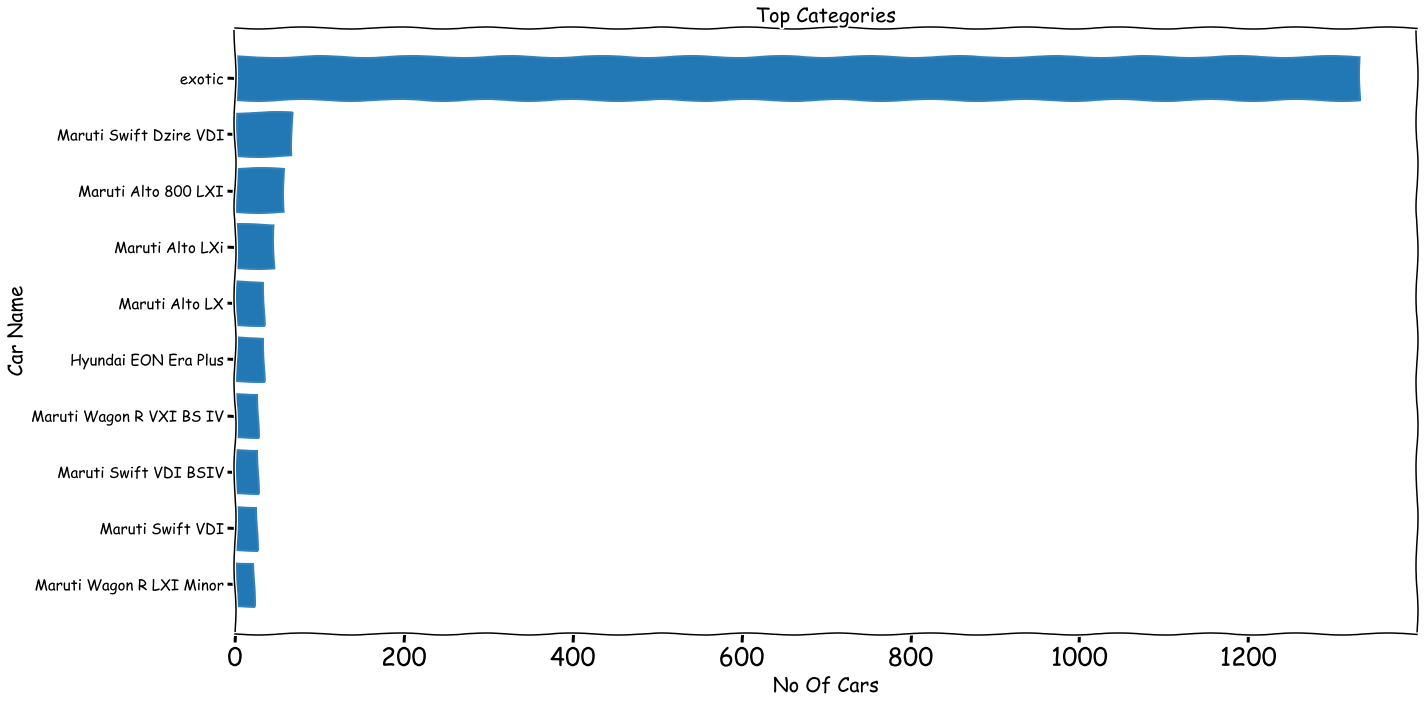

In [247]:
plt.xkcd()
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 10),
                        tight_layout = True)
 
axs.barh(new_df.head(10).index[::-1], sorted(new_df.head(10).no_of_cars), alpha = 0.9)
axs.set_xlabel("No Of Cars", fontsize = '20')
axs.set_ylabel("Car Name", fontsize = '20')
plt.yticks(fontsize='15')
plt.xticks(fontsize='25')
axs.set_title("Top Categories", fontsize = '20')

In [261]:
df_alt = df.copy()
df_alt.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [277]:
df1 = df_alt.groupby(by = ['year','owner'])[['name']].count()
df1.rename(columns = {'name': 'count'}, inplace = True)
df1.head()

count
year owner                      
1992 Fourth & Above Owner      1
1995 Second Owner              1
1996 First Owner               1
     Second Owner              1
1997 First Owner               1

<AxesSubplot:xlabel='year,owner'>

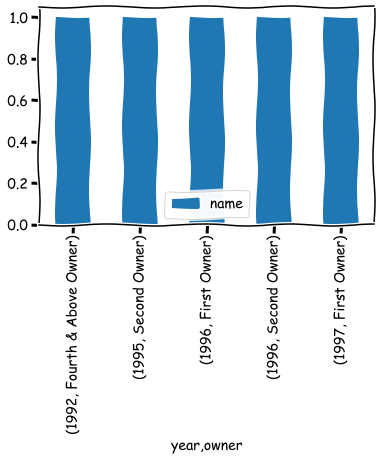

In [275]:
df1.head().plot.bar()

In [328]:
year = df.year.unique()

In [329]:
year.sort()
year
size = len(year)
size
year

array([1992, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020], dtype=int64)

In [321]:
first = []
second = []
third = []
fourth = []

counter = 0
year = None

for ele in df1.index:
    if year is None:
        counter = counter + 1
        year = ele[0]
        
        if ele[1] == 'First Owner':
            first.append(df1['count'].loc[ele])
        elif ele[1] == 'Second Owner':
            second.append(df1['count'].loc[ele])
        elif ele[1] == 'Third Owner':
            third.append(df1['count'].loc[ele])
        elif ele[1] == 'Fourth & Above Owner':
            fourth.append(df1['count'].loc[ele])    
    
        
    elif year == ele[0]:
        if ele[1] == 'First Owner':
            first.append(df1['count'].loc[ele])
        elif ele[1] == 'Second Owner':
            second.append(df1['count'].loc[ele])
        elif ele[1] == 'Third Owner':
            third.append(df1['count'].loc[ele])
        elif ele[1] == 'Fourth & Above Owner':
            fourth.append(df1['count'].loc[ele])    
    
    
    
    else:
        year = ele[0]
        
        if len(first) != counter:
            first.append(0)
        if len(second) != counter:
            second.append(0)
        if len(third) != counter:
            third.append(0)
        if len(fourth) != counter:
            fourth.append(0)    
        counter = counter + 1
        if ele[1] == 'First Owner':
            first.append(df1['count'].loc[ele])
        elif ele[1] == 'Second Owner':
            second.append(df1['count'].loc[ele])
        elif ele[1] == 'Third Owner':
            third.append(df1['count'].loc[ele])
        elif ele[1] == 'Fourth & Above Owner':
            fourth.append(df1['count'].loc[ele])    

if len(first) < counter:
    first.append(0)
if len(second) < counter:
    second.append(0)
if len(third) < counter:
    third.append(0)
if len(fourth) < counter:
    fourth.append(0)    

In [326]:
first

[0,
 0,
 1,
 1,
 0,
 1,
 4,
 5,
 7,
 7,
 13,
 33,
 30,
 41,
 59,
 77,
 91,
 124,
 230,
 260,
 227,
 324,
 305,
 428,
 344,
 185,
 35]

In [312]:
df1.head(10)    

count
year owner                      
1992 Fourth & Above Owner      1
1995 Second Owner              1
1996 First Owner               1
     Second Owner              1
1997 First Owner               1
     Second Owner              1
     Third Owner               1
1998 Fourth & Above Owner      3
     Second Owner              6
     Third Owner               3

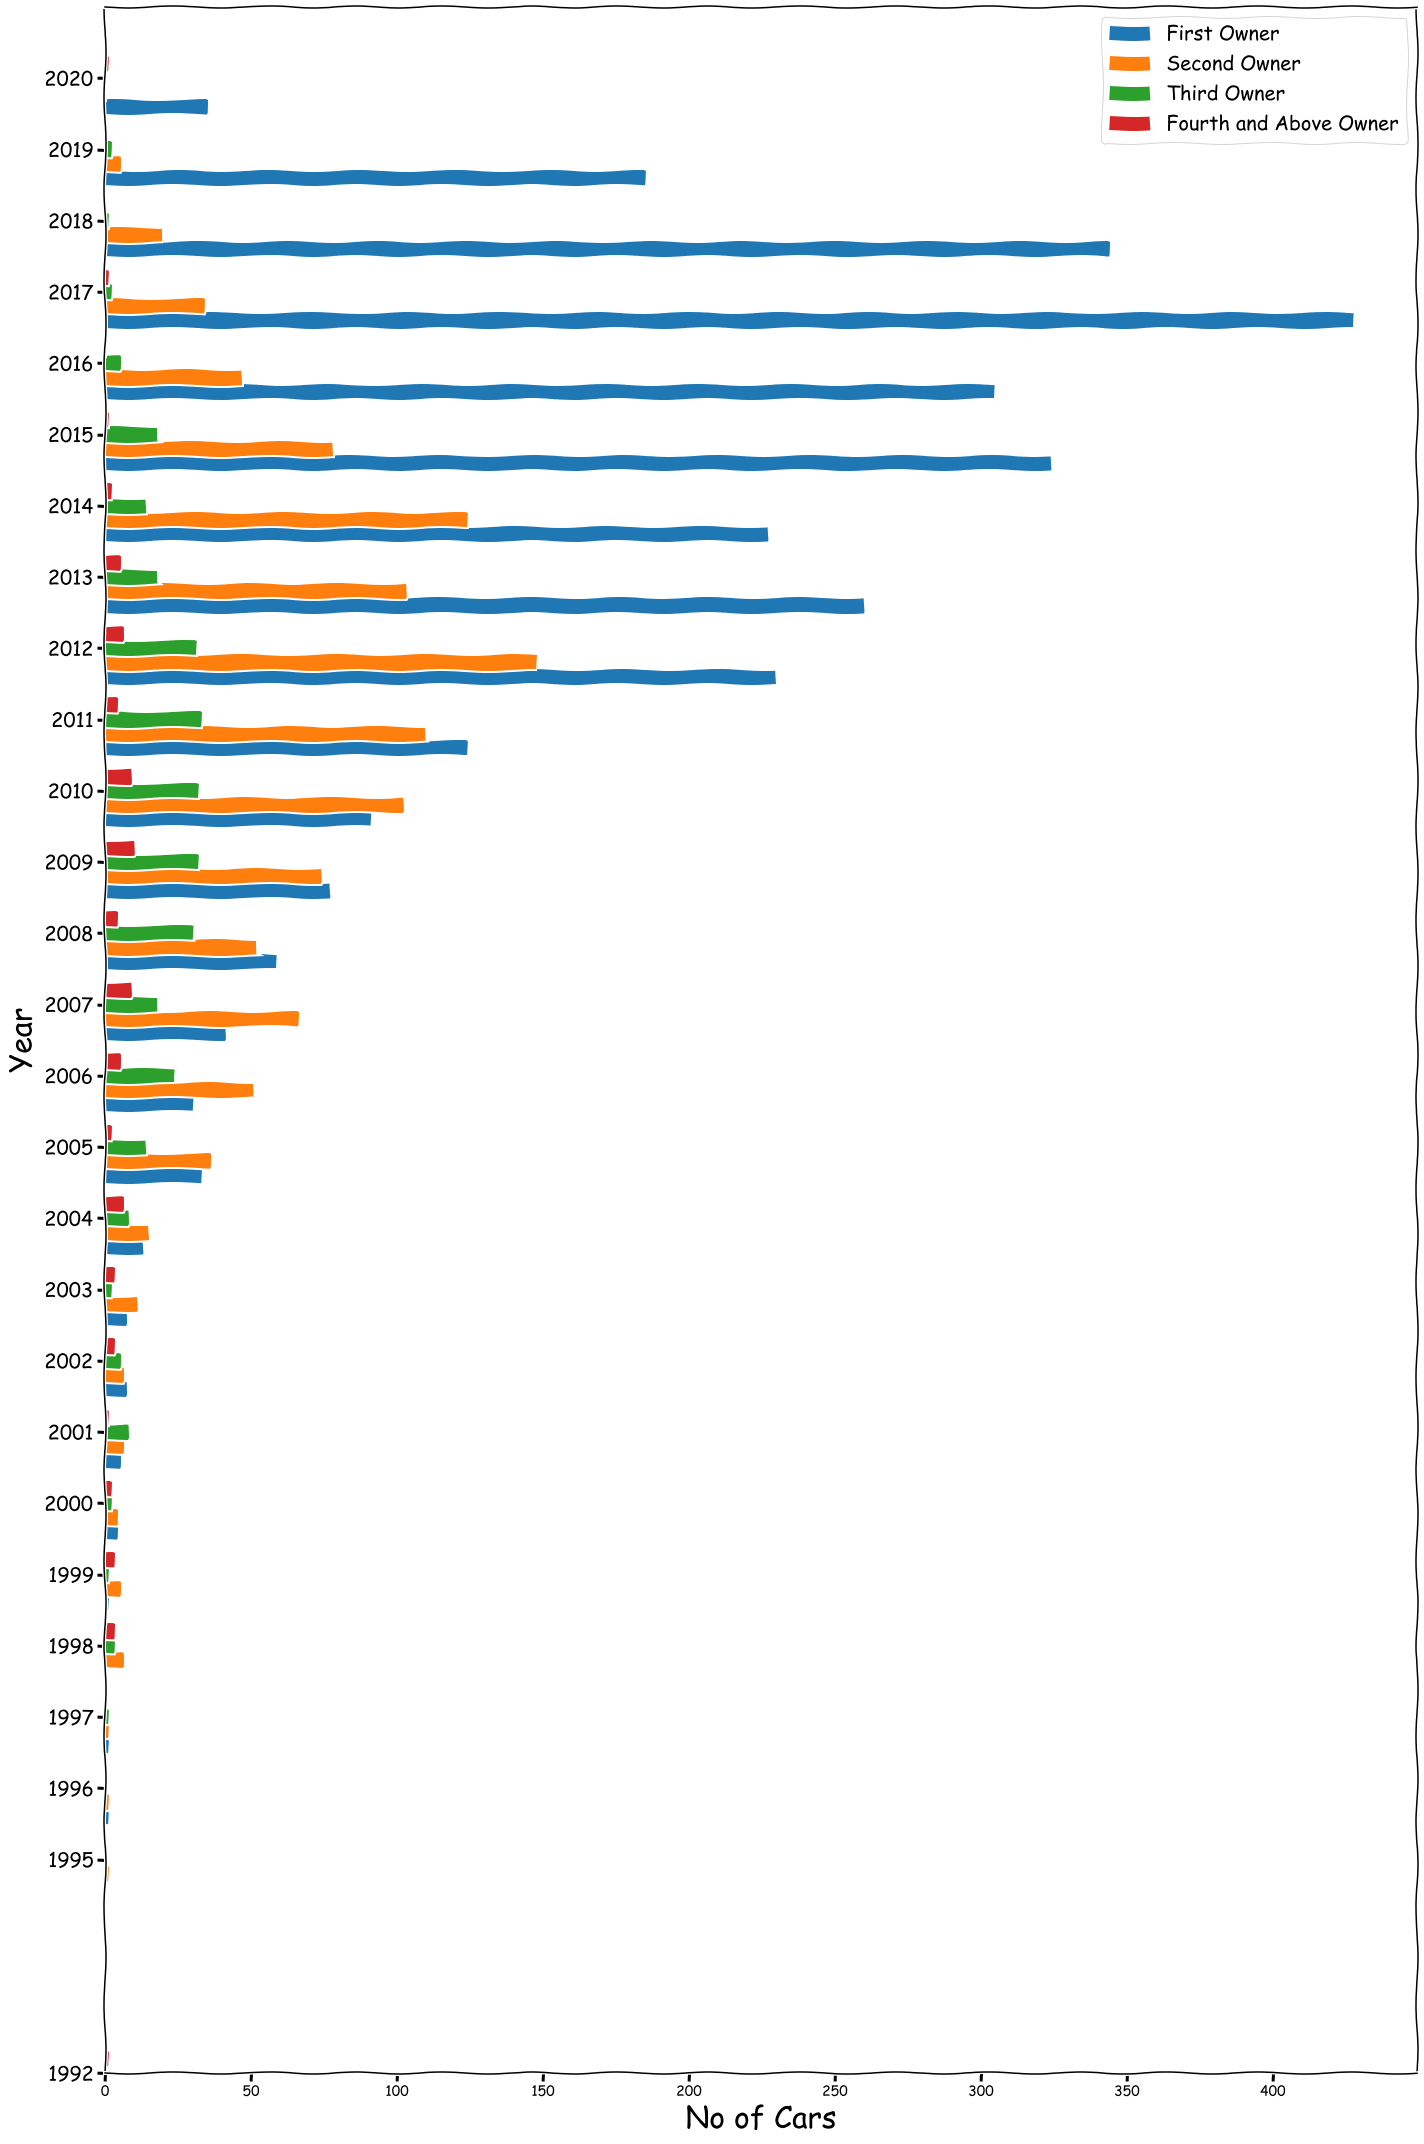

In [362]:
width = 0.2
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 30),
                        tight_layout = True)
plt.ylim([1994,2021])
axs.barh(year - 2*width, first, height = width, label = 'First Owner' )

axs.barh(year - width, second, height = width, label = 'Second Owner' )

axs.barh(year , third, height = width, label = 'Third Owner' )

axs.set_ylabel("Year", fontsize = '30')
axs.set_xlabel('No of Cars', fontsize = '30')
axs.barh(year + width, fourth, height = width, label = 'Fourth and Above Owner' )
plt.yticks(fontsize = '20', ticks = year)
plt.legend(fontsize = '20')
plt.show()